# Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll investigate using scikit-learn with regularization in order to produce better models.

## Objectives

- Compare the different inputs with logistic regression models and determine the optimal model 

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

## Import the data

Import the dataset stored in `'heart.csv'`.

In [2]:
# Import the data

df = pd.read_csv('heart.csv')

# Print the first five rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Split the data

Define `X` and `y` where the latter is the `target` variable. This time, follow best practices and also implement a standard train-test split. Assign 25% to the test set and set the `random_state` to 17. 

In [3]:
# Define X and y
y = df['target']
X = df.drop('target', axis = 1)

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

X = X.apply(normalize)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

target
1.0    130
0.0     97
Name: count, dtype: int64 

 target
0.0    41
1.0    35
Name: count, dtype: int64


## Initial Model - scikit-learn

Use scikit-learn to build the logistic regression model.

Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16. 

In [4]:
# Your code here
from sklearn.linear_model import LogisticRegression

#instantiate the model
log_reg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')

# fit the model on the training dataset
log_reg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

In [5]:
# Predict on test set
y_hat_test = log_reg.predict(X_test)

## Create an ROC Curve for the scikit-learn model

Use both the training and test sets.

Train AUC: 0.9315622521808089
Test AUC: 0.8989547038327527


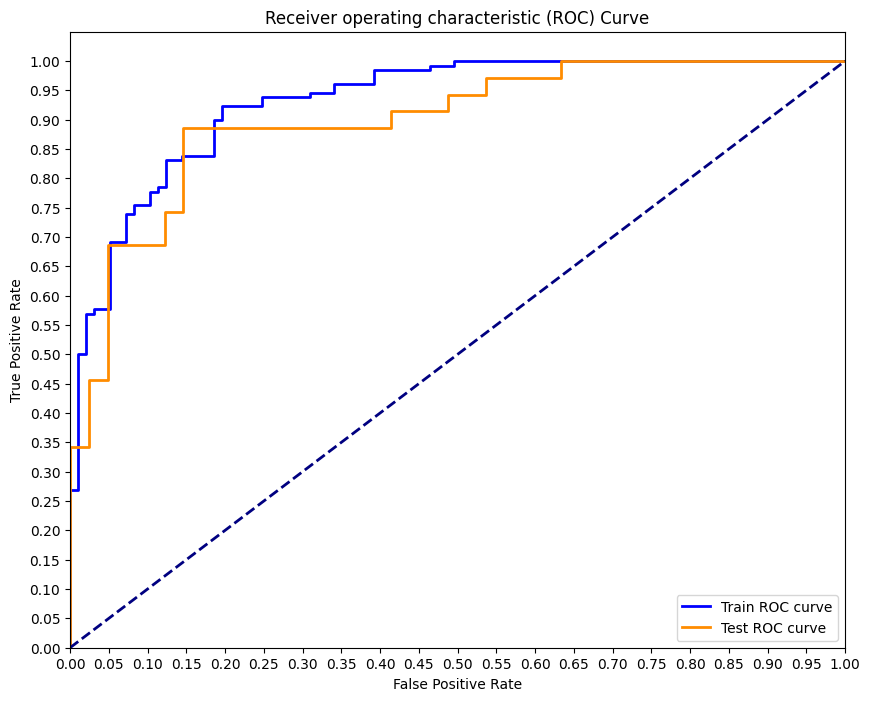

In [6]:
# Your code here

y_train_score = log_reg.predict_proba(X_train)[:,1]
y_test_score = log_reg.predict_proba(X_test)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)


print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Add an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter `C` set to a very large number such as 1e16. 

In [7]:
# Create new model
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')

#fiting the model on the dataset
logregi.fit(X_train, y_train)


LogisticRegression(C=1e+16, solver='liblinear')

Generate predictions for the training and test sets.

In [8]:
# Generate predictions
y_hat_train = logregi.predict(X_train)
y_hat_test_1 = logregi.predict(X_test)

In [12]:
# Generating a comprehensive report of the performance of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_test_1))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83        41
         1.0       0.78      0.89      0.83        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



Plot all three models ROC curves on the same graph.

Custom Model Test AUC: 0.8452961672473869
Custome Model Train AUC: 0.8429817605075336
Scikit-learn Model 1 Test AUC: 0.8989547038327527
Scikit-learn Model 1 Train AUC: 0.9315622521808089
Scikit-learn Model 2 with intercept Test AUC: 0.8989547038327527
Scikit-learn Model 2 with intercept Train AUC: 0.9325931800158604


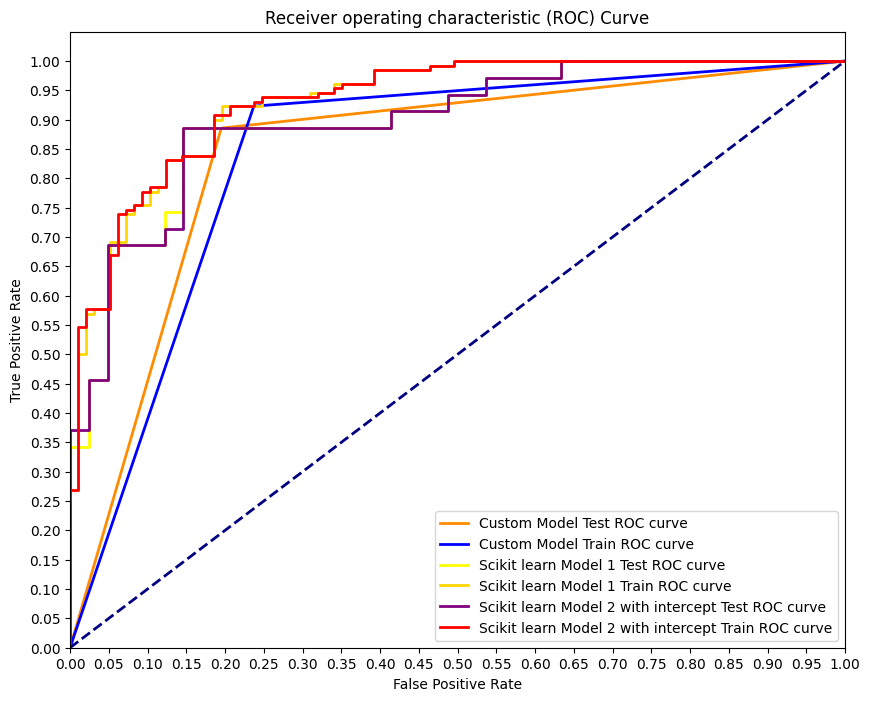

In [9]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = log_reg.decision_function(X_test)
y_train_score = log_reg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Adding the intercept improved the performance of the model on the training set from 0.9316 (auc) to 0.9326(auc) which is an increase  by 0.1%. The performance of both models on the test set remained unchanged.

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (`C`) parameters. For each, plot the ROC curve of the training and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

LogisticRegression(C=1, fit_intercept=False)
Test AUC for 1: 0.9017421602787457
Train AUC for 1: 0.9317208564631245
-------------------------------------------------------
LogisticRegression(C=4, fit_intercept=False)
Test AUC for 4: 0.8996515679442509
Train AUC for 4: 0.9316415543219667
-------------------------------------------------------
LogisticRegression(C=8, fit_intercept=False)
Test AUC for 8: 0.8989547038327527
Train AUC for 8: 0.9316415543219667
-------------------------------------------------------
LogisticRegression(C=12, fit_intercept=False)
Test AUC for 12: 0.8989547038327527
Train AUC for 12: 0.9316415543219667
-------------------------------------------------------
LogisticRegression(C=16, fit_intercept=False)
Test AUC for 16: 0.8989547038327527
Train AUC for 16: 0.9315622521808089
-------------------------------------------------------
LogisticRegression(C=20, fit_intercept=False)
Test AUC for 20: 0.8989547038327527
Train AUC for 20: 0.9315622521808089
---------------

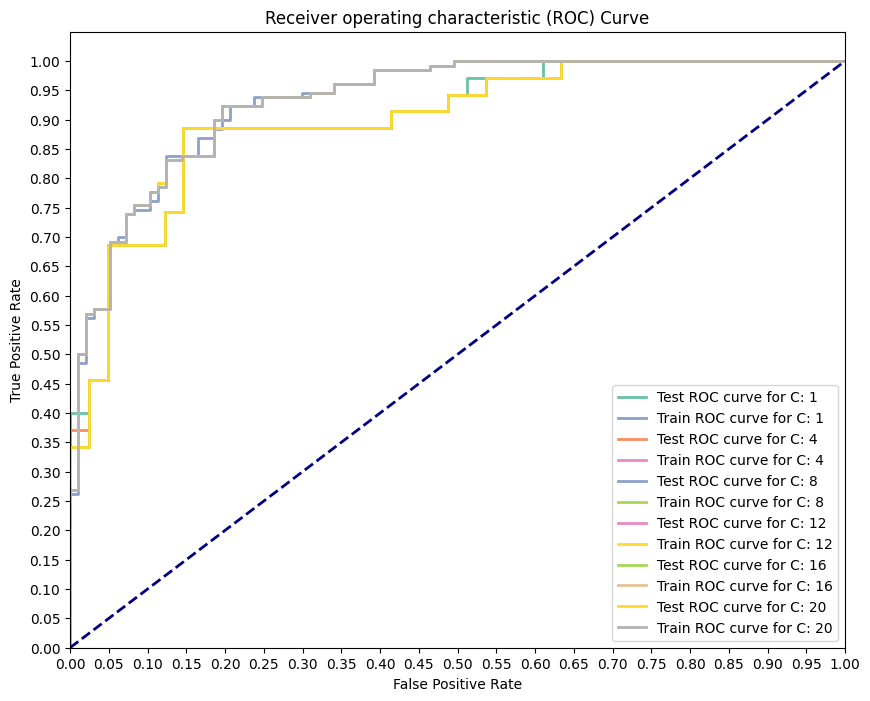

In [10]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [1, 4, 8, 12, 16, 20]
names = [1, 4, 8, 12, 16, 20]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver = "lbfgs")
    model_log = logreg.fit(X_train, y_train)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = model_log.predict(X_train)

    # calculate the probability scores
    y_test_score = logreg.fit(X_train, y_train).decision_function(X_test)
    y_train_score = logreg.fit(X_train, y_train).decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    
    print('Test AUC for {}: {}'.format(names[n], auc(test_fpr, test_tpr)))
    print('Train AUC for {}: {}'.format(names[n], auc(train_fpr, train_tpr)))
    print('-------------------------------------------------------')
    lw = 2
    
    plt.plot(test_fpr, test_tpr, color=colors[n],
         lw=lw, label='Test ROC curve for C: {}'.format(names[n]))
    plt.plot(train_fpr, train_tpr, color=colors[n + 2],
         lw=lw, label='Train ROC curve for C: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

How did the regularization parameter impact the ROC curves plotted above? 

As the regularization parameter is increased from 1 to 20 in the given steps, the performance of the model on the test set reduces drastically from ```0.90174``` and remains constant at approximately ``` 0.89895```. The performance of the model on the training set also declines but is higher than its performance on the test set which indicates model overfitting.

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.